
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'nbaiot-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F480187%2F897617%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240706%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240706T151243Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D82f75ba83106ad3f69debf599e454c7a52b73fa0b3c09510f24e6c224c874b88d15bdf19e739a47d2b5aad9012270bb9c526984db649bb487f232c0603e0ccfae90631802926b67e6758720e8b3c6e68e230dcfd3440652edbdad72b893f76682eda2640c1388adc4a5d4478976820fee5e560fc9c06b1c361f5655f0c9e1bb0dda1e418e1b1ce9012a2bcd2227c1752e7d129429259a77f1c97a7ff7d026deacd5a8d31411f06fc584fbacbbdc9b3410689125ef1953ee1b8611e2c161cf2a3ff407d771f794277cf09428b2391a661675ee46df68b93c07e5432a5d4e46b13b469a6e611613c4734dd8c039e2db8aa8e8ca168ae7ac87514e6495fe2be8ab4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "./input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
benign_df = pd.read_csv('./input/nbaiot-dataset/5.benign.csv')

g_c_df = pd.read_csv('./input/nbaiot-dataset/5.gafgyt.combo.csv')
g_j_df = pd.read_csv('./input/nbaiot-dataset/5.gafgyt.junk.csv')
g_s_df = pd.read_csv('./input/nbaiot-dataset/5.gafgyt.scan.csv')
g_t_df = pd.read_csv('./input/nbaiot-dataset/5.gafgyt.tcp.csv')
g_u_df = pd.read_csv('./input/nbaiot-dataset/5.gafgyt.udp.csv')
m_a_df = pd.read_csv('./input/nbaiot-dataset/5.mirai.ack.csv')
m_sc_df = pd.read_csv('./input/nbaiot-dataset/5.mirai.scan.csv')
m_sy_df = pd.read_csv('./input/nbaiot-dataset/5.mirai.syn.csv')
m_u_df = pd.read_csv('./input/nbaiot-dataset/5.mirai.udp.csv')
m_u_p_df = pd.read_csv('./input/nbaiot-dataset/5.mirai.udpplain.csv')

In [3]:
benign_df['type'] = 'benign'
m_u_df['type'] = 'mirai udp'
g_c_df['type'] = 'gafgyt combo'
g_j_df['type'] = 'gafgyt junk'
g_s_df['type'] = 'gafgyt scan'
g_t_df['type'] = 'gafgyt tcp'
g_u_df['type'] = 'gafgyt udp'
m_a_df['type'] = 'mirai ack'
m_sc_df['type'] = 'mirai scan'
m_sy_df['type'] = 'mirai syn'
m_u_p_df['type'] = 'mirai udpplain'

In [4]:
df = pd.concat([benign_df, m_u_df, g_c_df,
                g_j_df, g_s_df, g_t_df,
                g_u_df, m_a_df, m_sc_df,
                m_sy_df, m_u_p_df],
                axis=0, sort=False, ignore_index=True)

In [5]:
#file 1

file1 = pd.read_csv('./input/nbaiot-dataset/1.benign.csv')
file1['type'] = 'benign'
df = pd.concat([df,file1])
del file1
file2 = pd.read_csv('./input/nbaiot-dataset/1.gafgyt.combo.csv')
file2['type'] = 'gafgyt combo'
df = pd.concat([df,file2])
del file2



file3 = pd.read_csv('./input/nbaiot-dataset/1.gafgyt.junk.csv')
file3['type'] = 'gafgyt junk'
df= pd.concat([df,file3])
del file3
file4 = pd.read_csv('./input/nbaiot-dataset/1.gafgyt.scan.csv')
file4['type'] = 'gafgyt scan'
df = pd.concat([df,file4])
del file4
file5 = pd.read_csv('./input/nbaiot-dataset/1.gafgyt.tcp.csv')
file5['type'] = 'gafgyt tcp'
df = pd.concat([df,file5])
del file5
file6 = pd.read_csv('./input/nbaiot-dataset/1.gafgyt.udp.csv')
file6['type'] = 'gafgyt udp'
df = pd.concat([df,file6])
del file6
file7 = pd.read_csv('./input/nbaiot-dataset/1.mirai.ack.csv')
file7['type'] = 'mirai ack'
df = pd.concat([df,file7])
del file7
file8 = pd.read_csv('./input/nbaiot-dataset/1.mirai.scan.csv')
file8['type'] = 'mirai scan'
df = pd.concat([df,file8])
del file8
file9 = pd.read_csv('./input/nbaiot-dataset/1.mirai.syn.csv')
file9['type'] = 'mirai syn'
df = pd.concat([df,file9])
del file9
file10 = pd.read_csv('./input/nbaiot-dataset/1.mirai.udp.csv')
file10['type'] = 'mirai udp'
df = pd.concat([df,file10])
del file10
file11 = pd.read_csv('./input/nbaiot-dataset/1.mirai.udpplain.csv')
file11['type'] = 'mirai udpplain'
df = pd.concat([df,file11])
del file11

In [6]:
#file 2


file1 = pd.read_csv('./input/nbaiot-dataset/2.benign.csv')
file1['type'] = 'benign'
df = pd.concat([df,file1])
del file1
file2 = pd.read_csv('./input/nbaiot-dataset/2.gafgyt.combo.csv')
file2['type'] = 'gafgyt combo'
df = pd.concat([df,file2])
del file2



file3 = pd.read_csv('./input/nbaiot-dataset/2.gafgyt.junk.csv')
file3['type'] = 'gafgyt junk'
df= pd.concat([df,file3])
del file3
file4 = pd.read_csv('./input/nbaiot-dataset/2.gafgyt.scan.csv')
file4['type'] = 'gafgyt scan'
df = pd.concat([df,file4])
del file4
file5 = pd.read_csv('./input/nbaiot-dataset/2.gafgyt.tcp.csv')
file5['type'] = 'gafgyt tcp'
df = pd.concat([df,file5])
del file5
file6 = pd.read_csv('./input/nbaiot-dataset/2.gafgyt.udp.csv')
file6['type'] = 'gafgyt udp'
df = pd.concat([df,file6])
del file6
file7 = pd.read_csv('./input/nbaiot-dataset/2.mirai.ack.csv')
file7['type'] = 'mirai ack'
df = pd.concat([df,file7])
del file7
file8 = pd.read_csv('./input/nbaiot-dataset/2.mirai.scan.csv')
file8['type'] = 'mirai scan'
df = pd.concat([df,file8])
del file8
file9 = pd.read_csv('./input/nbaiot-dataset/2.mirai.syn.csv')
file9['type'] = 'mirai syn'
df = pd.concat([df,file9])
del file9
file10 = pd.read_csv('./input/nbaiot-dataset/2.mirai.udp.csv')
file10['type'] = 'mirai udp'
df = pd.concat([df,file10])
del file10
file11 = pd.read_csv('./input/nbaiot-dataset/2.mirai.udpplain.csv')
file11['type'] = 'mirai udpplain'
df = pd.concat([df,file11])
del file11

In [7]:
#file 3


file1 = pd.read_csv('./input/nbaiot-dataset/3.benign.csv')
file1['type'] = 'benign'
df = pd.concat([df,file1])
del file1
file2 = pd.read_csv('./input/nbaiot-dataset/3.gafgyt.combo.csv')
file2['type'] = 'gafgyt combo'
df = pd.concat([df,file2])
del file2



file3 = pd.read_csv('./input/nbaiot-dataset/3.gafgyt.junk.csv')
file3['type'] = 'gafgyt junk'
df= pd.concat([df,file3])
del file3
file4 = pd.read_csv('./input/nbaiot-dataset/3.gafgyt.scan.csv')
file4['type'] = 'gafgyt scan'
df = pd.concat([df,file4])
del file4
file5 = pd.read_csv('./input/nbaiot-dataset/3.gafgyt.tcp.csv')
file5['type'] = 'gafgyt tcp'
df = pd.concat([df,file5])
del file5
file6 = pd.read_csv('./input/nbaiot-dataset/3.gafgyt.udp.csv')
file6['type'] = 'gafgyt udp'
df = pd.concat([df,file6])
del file6
# file7 = pd.read_csv('./input/nbaiot-dataset/3.mirai.ack.csv')
# file7['type'] = 'mirai ack'
# df = pd.concat([df,file7])
# del file7
# file8 = pd.read_csv('./input/nbaiot-dataset/3.mirai.scan.csv')
# file8['type'] = 'mirai scan'
# df = pd.concat([df,file8])
# del file8
# file9 = pd.read_csv('./input/nbaiot-dataset/3.mirai.syn.csv')
# file9['type'] = 'mirai syn'
# df = pd.concat([df,file9])
# del file9
# file10 = pd.read_csv('./input/nbaiot-dataset/3.mirai.udp.csv')
# file10['type'] = 'mirai udp'
# df = pd.concat([df,file10])
# del file10
# file11 = pd.read_csv('./input/nbaiot-dataset/3.mirai.udpplain.csv')
# file11['type'] = 'mirai udpplain'
# df = pd.concat([df,file11])
# del file11

In [8]:
#file 6


file1 = pd.read_csv('./input/nbaiot-dataset/6.benign.csv')
file1['type'] = 'benign'
df = pd.concat([df,file1])
del file1
file2 = pd.read_csv('./input/nbaiot-dataset/6.gafgyt.combo.csv')
file2['type'] = 'gafgyt combo'
df = pd.concat([df,file2])
del file2



file3 = pd.read_csv('./input/nbaiot-dataset/6.gafgyt.junk.csv')
file3['type'] = 'gafgyt junk'
df= pd.concat([df,file3])
del file3
file4 = pd.read_csv('./input/nbaiot-dataset/6.gafgyt.scan.csv')
file4['type'] = 'gafgyt scan'
df = pd.concat([df,file4])
del file4
file5 = pd.read_csv('./input/nbaiot-dataset/6.gafgyt.tcp.csv')
file5['type'] = 'gafgyt tcp'
df = pd.concat([df,file5])
del file5
file6 = pd.read_csv('./input/nbaiot-dataset/6.gafgyt.udp.csv')
file6['type'] = 'gafgyt udp'
df = pd.concat([df,file6])
del file6
file7 = pd.read_csv('./input/nbaiot-dataset/6.mirai.ack.csv')
file7['type'] = 'mirai ack'
df = pd.concat([df,file7])
del file7
file8 = pd.read_csv('./input/nbaiot-dataset/6.mirai.scan.csv')
file8['type'] = 'mirai scan'
df = pd.concat([df,file8])
del file8
file9 = pd.read_csv('./input/nbaiot-dataset/6.mirai.syn.csv')
file9['type'] = 'mirai syn'
df = pd.concat([df,file9])
del file9
file10 = pd.read_csv('./input/nbaiot-dataset/6.mirai.udp.csv')
file10['type'] = 'mirai udp'
df = pd.concat([df,file10])
del file10
file11 = pd.read_csv('./input/nbaiot-dataset/6.mirai.udpplain.csv')
file11['type'] = 'mirai udpplain'
df = pd.concat([df,file11])
del file11

In [9]:
#file 7


file1 = pd.read_csv('./input/nbaiot-dataset/7.benign.csv')
file1['type'] = 'benign'
df = pd.concat([df,file1])
del file1
file2 = pd.read_csv('./input/nbaiot-dataset/7.gafgyt.combo.csv')
file2['type'] = 'gafgyt combo'
df = pd.concat([df,file2])
del file2



file3 = pd.read_csv('./input/nbaiot-dataset/7.gafgyt.junk.csv')
file3['type'] = 'gafgyt junk'
df= pd.concat([df,file3])
del file3
file4 = pd.read_csv('./input/nbaiot-dataset/7.gafgyt.scan.csv')
file4['type'] = 'gafgyt scan'
df = pd.concat([df,file4])
del file4
file5 = pd.read_csv('./input/nbaiot-dataset/7.gafgyt.tcp.csv')
file5['type'] = 'gafgyt tcp'
df = pd.concat([df,file5])
del file5
file6 = pd.read_csv('./input/nbaiot-dataset/7.gafgyt.udp.csv')
file6['type'] = 'gafgyt udp'
df = pd.concat([df,file6])
del file6
# file7 = pd.read_csv('./input/nbaiot-dataset/7.mirai.ack.csv')
# file7['type'] = 'mirai ack'
# df = pd.concat([df,file7])
# del file7
# file8 = pd.read_csv('./input/nbaiot-dataset/7.mirai.scan.csv')
# file8['type'] = 'mirai scan'
# df = pd.concat([df,file8])
# del file8
# file9 = pd.read_csv('./input/nbaiot-dataset/7.mirai.syn.csv')
# file9['type'] = 'mirai syn'
# df = pd.concat([df,file9])
# del file9
# file10 = pd.read_csv('./input/nbaiot-dataset/7.mirai.udp.csv')
# file10['type'] = 'mirai udp'
# df = pd.concat([df,file10])
# del file10
# file11 = pd.read_csv('./input/nbaiot-dataset/7.mirai.udpplain.csv')
# file11['type'] = 'mirai udpplain'
# df = pd.concat([df,file11])
# del file11

In [10]:
#file 8


file1 = pd.read_csv('./input/nbaiot-dataset/8.benign.csv')
file1['type'] = 'benign'
df = pd.concat([df,file1])
del file1
file2 = pd.read_csv('./input/nbaiot-dataset/8.gafgyt.combo.csv')
file2['type'] = 'gafgyt combo'
df = pd.concat([df,file2])
del file2



file3 = pd.read_csv('./input/nbaiot-dataset/8.gafgyt.junk.csv')
file3['type'] = 'gafgyt junk'
df= pd.concat([df,file3])
del file3
file4 = pd.read_csv('./input/nbaiot-dataset/8.gafgyt.scan.csv')
file4['type'] = 'gafgyt scan'
df = pd.concat([df,file4])
del file4
file5 = pd.read_csv('./input/nbaiot-dataset/8.gafgyt.tcp.csv')
file5['type'] = 'gafgyt tcp'
df = pd.concat([df,file5])
del file5
file6 = pd.read_csv('./input/nbaiot-dataset/8.gafgyt.udp.csv')
file6['type'] = 'gafgyt udp'
df = pd.concat([df,file6])
del file6
file7 = pd.read_csv('./input/nbaiot-dataset/8.mirai.ack.csv')
file7['type'] = 'mirai ack'
df = pd.concat([df,file7])
del file7
file8 = pd.read_csv('./input/nbaiot-dataset/8.mirai.scan.csv')
file8['type'] = 'mirai scan'
df = pd.concat([df,file8])
del file8
file9 = pd.read_csv('./input/nbaiot-dataset/8.mirai.syn.csv')
file9['type'] = 'mirai syn'
df = pd.concat([df,file9])
del file9
file10 = pd.read_csv('./input/nbaiot-dataset/8.mirai.udp.csv')
file10['type'] = 'mirai udp'
df = pd.concat([df,file10])
del file10
file11 = pd.read_csv('./input/nbaiot-dataset/8.mirai.udpplain.csv')
file11['type'] = 'mirai udpplain'
df = pd.concat([df,file11])
del file11

In [11]:
#file 9


file1 = pd.read_csv('./input/nbaiot-dataset/9.benign.csv')
file1['type'] = 'benign'
df = pd.concat([df,file1])
del file1
file2 = pd.read_csv('./input/nbaiot-dataset/9.gafgyt.combo.csv')
file2['type'] = 'gafgyt combo'
df = pd.concat([df,file2])
del file2



file3 = pd.read_csv('./input/nbaiot-dataset/9.gafgyt.junk.csv')
file3['type'] = 'gafgyt junk'
df= pd.concat([df,file3])
del file3
file4 = pd.read_csv('./input/nbaiot-dataset/9.gafgyt.scan.csv')
file4['type'] = 'gafgyt scan'
df = pd.concat([df,file4])
del file4
file5 = pd.read_csv('./input/nbaiot-dataset/9.gafgyt.tcp.csv')
file5['type'] = 'gafgyt tcp'
df = pd.concat([df,file5])
del file5
file6 = pd.read_csv('./input/nbaiot-dataset/9.gafgyt.udp.csv')
file6['type'] = 'gafgyt udp'
df = pd.concat([df,file6])
del file6
file7 = pd.read_csv('./input/nbaiot-dataset/9.mirai.ack.csv')
file7['type'] = 'mirai ack'
df = pd.concat([df,file7])
del file7
file8 = pd.read_csv('./input/nbaiot-dataset/9.mirai.scan.csv')
file8['type'] = 'mirai scan'
df = pd.concat([df,file8])
del file8
file9 = pd.read_csv('./input/nbaiot-dataset/9.mirai.syn.csv')
file9['type'] = 'mirai syn'
df = pd.concat([df,file9])
del file9
file10 = pd.read_csv('./input/nbaiot-dataset/9.mirai.udp.csv')
file10['type'] = 'mirai udp'
df = pd.concat([df,file10])
del file10
file11 = pd.read_csv('./input/nbaiot-dataset/9.mirai.udpplain.csv')
file11['type'] = 'mirai udpplain'
df = pd.concat([df,file11])
del file11

In [12]:
df["type"].value_counts()

type
mirai udp         1012965
gafgyt udp         840584
gafgyt tcp         767269
mirai syn          615171
mirai ack          552698
gafgyt combo       457004
mirai udpplain     442496
mirai scan         434358
benign             380692
gafgyt junk        233440
gafgyt scan        227252
Name: count, dtype: int64

<Axes: title={'center': 'Class Distribution'}>

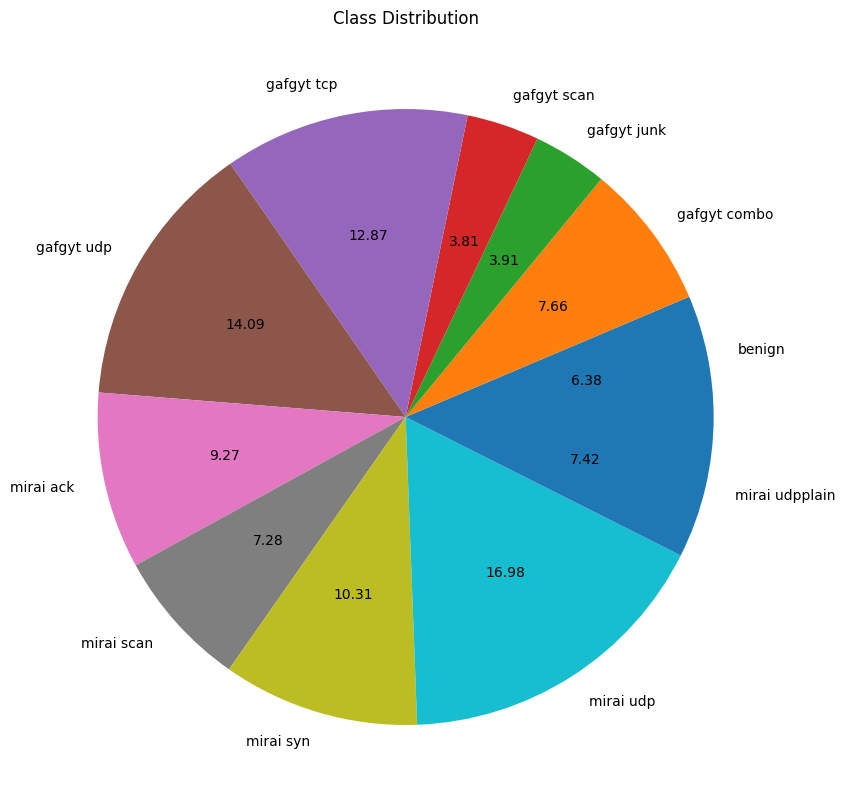

In [13]:
from matplotlib import pyplot as plt

plt.title("Class Distribution")
df.groupby("type").size().plot(kind='pie', autopct='%.2f', figsize=(20,10))

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5963929 entries, 0 to 84435
Columns: 116 entries, MI_dir_L5_weight to type
dtypes: float64(115), object(1)
memory usage: 5.2+ GB


In [15]:
df = df.sample(frac=1).reset_index(drop=True)

In [16]:
df.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,178.218504,74.334507,83.816565,289.509954,74.496742,123.389481,779.951792,74.626798,249.722651,6752.107290,...,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,gafgyt junk
1,103.381083,434.409531,44775.811451,184.574178,407.445897,50919.621797,628.394124,414.740314,49400.733144,6403.534961,...,0.0,0.0,1.0,554.0,0.0,554.0,0.0,0.0,0.0,mirai udp
2,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,gafgyt udp
3,68.587077,439.559656,43431.187709,105.129422,434.447012,44752.126523,332.032431,383.024244,55206.815594,3772.124345,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,mirai udp
4,102.539268,277.262157,60124.346409,162.281962,313.683365,60962.146139,511.311885,344.530633,59589.909203,4343.954201,...,0.0,0.0,1.0,554.0,0.0,554.0,0.0,0.0,0.0,mirai udp


In [17]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["type"])

In [18]:
features = list(train_df.columns)
features.remove("type")
#features

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df["type"] = label_encoder.fit_transform(train_df["type"])
test_df["type"] = label_encoder.transform(test_df["type"])

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])

In [21]:
X_train = train_df[features].values
y_train = train_df["type"].values

X_test = test_df[features].values
y_test = test_df["type"].values

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


clf = ExtraTreesClassifier(n_estimators=50, n_jobs=-1)
clf = clf.fit(X_train, y_train)
clf.feature_importances_

array([1.49353131e-02, 8.61024988e-03, 2.41692553e-03, 3.31773968e-02,
       1.10913735e-02, 2.43201807e-03, 1.99962769e-02, 1.25084926e-02,
       5.77843747e-03, 2.32541684e-02, 2.44737810e-02, 1.74759106e-02,
       2.93237402e-02, 6.44060277e-02, 2.92228229e-02, 1.49698109e-02,
       4.31952994e-03, 3.15238475e-03, 1.25894426e-02, 1.77349248e-02,
       7.18744324e-03, 2.02804369e-02, 1.39759950e-02, 2.71145615e-03,
       3.77261163e-02, 2.24524525e-02, 1.36691332e-02, 1.97916536e-02,
       4.27663885e-02, 1.81178852e-02, 7.56034196e-03, 6.23401835e-03,
       3.00470116e-04, 1.00056558e-02, 3.89037863e-05, 1.95778712e-06,
       4.72812705e-06, 6.52495534e-03, 3.23094285e-03, 3.38660665e-04,
       6.51615077e-03, 2.51102897e-04, 4.20424604e-05, 9.19761270e-06,
       9.76793649e-03, 9.02812211e-03, 8.70221469e-04, 1.14510104e-02,
       1.12136504e-04, 1.99292335e-05, 4.97929806e-05, 8.21933385e-03,
       1.26376684e-02, 1.05376769e-03, 1.18090792e-02, 5.17755317e-04,
      

In [23]:
ext=pd.DataFrame(clf.feature_importances_,columns=["extratrees_importance"])
ext = ext.sort_values(['extratrees_importance'], ascending=False)
feature_index = [features[i] for i in list(ext.index)]
ext["Feature_Name"] = feature_index
ext

,extratrees_importance,Feature_Name
13,6.440603e-02,MI_dir_L0.01_mean
28,4.276639e-02,H_L0.01_mean
24,3.772612e-02,H_L0.1_weight
78,3.472896e-02,HH_jit_L0.01_mean
3,3.317740e-02,MI_dir_L3_weight
...,...,...
93,2.567599e-06,HpHp_L3_pcc
35,1.957787e-06,HH_L5_covariance
92,1.250485e-06,HpHp_L3_covariance
85,7.180949e-07,HpHp_L5_covariance


In [24]:
model = SelectFromModel(clf, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)
X_test.shape

(1192786, 43)

In [25]:
X_train = X_train.reshape((-1, X_train.shape[-1], 1))
X_test = X_test.reshape((-1, X_test.shape[-1], 1))

In [26]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)

class_weights = {k: v for k,v in enumerate(class_weights)}
class_weights

{0: 1.4241818289277852,
 1: 1.1863695667904057,
 2: 2.3225468681849337,
 3: 2.385783834761294,
 4: 0.7066302920705306,
 5: 0.6449985987822046,
 6: 0.9809621735381305,
 7: 1.2482237348476564,
 8: 0.8813405062559262,
 9: 0.5352360060901323,
 10: 1.2252653913091713}

In [27]:
input_shape = X_train.shape[1:]
nb_classes = len(label_encoder.classes_)

In [28]:
from tensorflow.keras.utils import to_categorical

def convert_to_categorical(y, nb_classes):
    return to_categorical(y, num_classes=nb_classes)

2024-09-04 16:51:57.583224: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-04 16:51:59.951058: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-04 16:52:01.589686: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-04 16:52:07.059547: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

now this time we have to clustering based on y data set


steps:-
1-Randomly determine the number of attacks each client should specialize in.
2-Generate random proportions for these attacks.
3-Ensure benign traffic has a proportion that varies for each client.

# Define proportions for attacks and benign traffic for each client
    attack_proportions =[
    {3: 0.45, 7: 0.4, 'benign': 0.15},
    {1: 0.35, 4: 0.3, 6: 0.2, 'benign': 0.15},
    {2: 0.6, 5: 0.25, 'benign': 0.15},
    {8: 0.5, 9: 0.35, 'benign': 0.15},
    {1: 0.4, 3: 0.3, 7: 0.15, 'benign': 0.15},
    {2: 0.45, 6: 0.4, 'benign': 0.15},
    {4: 0.5, 5: 0.35, 'benign': 0.15},
    {1: 0.3, 8: 0.25, 9: 0.3, 'benign': 0.15},
    {3: 0.4, 5: 0.35, 7: 0.1, 'benign': 0.15}]

    






In [29]:
def generate_random_proportions(num_attacks, min_attacks=1, max_attacks=3):
    num_client_attacks = np.random.randint(min_attacks, max_attacks + 1)  # Random number of attacks per client
    attack_proportions = np.random.dirichlet(np.ones(num_client_attacks), size=1).flatten()  # Random proportions for attacks
    benign_proportion = np.random.uniform(0.1, 0.3)  # Random proportion for benign traffic
    attack_proportions *= (1 - benign_proportion)  # Scale attack proportions to sum to (1 - benign_proportion)

    attack_types = np.random.choice(range(1, num_attacks + 1), num_client_attacks, replace=False)  # Randomly select attack types
    proportions = {attack_types[i]: attack_proportions[i] for i in range(num_client_attacks)}
    proportions['benign'] = benign_proportion

    return proportions



In [30]:
# Example usage:
attack_proportions = [generate_random_proportions(10) for _ in range(9)]


In [31]:
def iid_data_indices(labels: np.ndarray, nb_clients: int):
    data_len = len(labels)
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    chunks = np.array_split(indices, nb_clients)
    return chunks

In [32]:
def non_iid_data_indices(labels: np.ndarray, nb_clients: int):
    data_len = len(labels)
    indices = np.arange(data_len)
    indices = indices[labels.argsort()]

    indices_end_list = []
    for i in range(0, nb_clients-1):
        y = random.randrange(data_len-2)
        indices_end_list.append(y)

    indices_end_list.sort()
    indices_end_list = indices_end_list+[data_len]

    indices_for_users = []
    prev_index = 0
#     sum_res = 0
    for curr_index in indices_end_list:
        indices_for_users.append(indices[prev_index:curr_index])
        prev_index = curr_index
#         sum_res += len(indices_for_users[-1])
#     print(sum_res, data_len)
    return indices_for_users

In [33]:
def sample(y:np.ndarray, sampling_technique: str, nb_clients: int):
    if sampling_technique.lower() == "iid":
        sampler_fn = iid_data_indices
    else:
        sampler_fn = non_iid_data_indices
    client_data_indices = sampler_fn(y, nb_clients)
    return client_data_indices

In [34]:
# def assign_data_to_clients(clients: dict, X:np.ndarray, y:np.ndarray, nb_classes:int, sampling_technique: str):
#     sampled_data_indices = sample(y, sampling_technique, len(clients.keys()))
#     for client_name, data_indices in zip(clients.keys(), sampled_data_indices):
#         X = X_train[data_indices]
#         y = y_train[data_indices]
#         y = convert_to_categorical(y, nb_classes)
#         clients[client_name] = list(zip(X, y))
#     return clients

In [35]:
def assign_data_to_clients(clients, X, y, nb_classes):
    client_names = list(clients.keys())

    for client_name in client_names:
        client_X, client_y = clients[client_name]
        client_y = convert_to_categorical(client_y, nb_classes)
        clients[client_name] = list(zip(client_X, client_y))

    return clients

# def convert_to_categorical(y, nb_classes):
#     return to_categorical(y, num_classes=nb_classes)

# # Example usage:
# nb_classes = len(np.unique(df['type']))
# clients = create_clients(df.drop('type', axis=1).values, df['type'].values, nb_classes)
# clients_batched = assign_data_to_clients(clients, df.drop('type', axis=1).values, df['type'].values, nb_classes)


In [36]:
# def create_clients(X, y, nb_classes, sampling_technique, num_clients=10, initial='clients'):
#     #create a list of client names
#     client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]
#     clients = {client_names[i] : [] for i in range(len(client_names))}
#     return assign_data_to_clients(clients, X, y, nb_classes, sampling_technique)

In [37]:
def create_clients(X, y, num_clients=10, initial='clients'):
    client_names = [f'{initial}_{i+1}' for i in range(num_clients)]
    clients = {client_name: [] for client_name in client_names}
    proportions_dict = {client_name: {} for client_name in client_names}

    num_attacks = len(np.unique(y)) - 1  # Exclude the benign class

    all_indices = np.arange(len(y))
    np.random.shuffle(all_indices)  # Shuffle all indices to ensure randomness

    for client_name in client_names:
        attack_proportions = generate_random_proportions(num_attacks)
        client_data_indices = []
        proportions_dict[client_name] = attack_proportions  # Store proportions

        for attack_type, proportion in attack_proportions.items():
            if attack_type == 'benign':
                attack_indices = np.where(y[all_indices] == 0)[0]
            else:
                attack_indices = np.where(y[all_indices] == attack_type)[0]

            if len(attack_indices) > 0:
                selected_indices = np.random.choice(attack_indices, int(len(attack_indices) * proportion), replace=False)
                client_data_indices.extend(all_indices[selected_indices])
                all_indices = np.setdiff1d(all_indices, all_indices[selected_indices])  # Remove assigned indices

        clients[client_name] = (X[client_data_indices], y[client_data_indices])

    # Distribute any remaining indices randomly
    remaining_indices = all_indices
    for i, client_name in enumerate(client_names):
        if len(remaining_indices) > 0:
            chunk_size = len(remaining_indices) // (num_clients - i)
            if chunk_size > 0:
                clients[client_name] = (np.append(clients[client_name][0], X[remaining_indices[:chunk_size]], axis=0),
                                        np.append(clients[client_name][1], y[remaining_indices[:chunk_size]], axis=0))
                remaining_indices = remaining_indices[chunk_size:]

    for client_name, proportions in proportions_dict.items():
        print(f"Client {client_name} proportions: {proportions}")

    return clients

In [38]:
import tensorflow as tf

def batch_data(data_shard, batch_size=64):
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    del data_shard

    len_label = len(label)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    del data, label
    return dataset.shuffle(len_label).batch(batch_size)

In [39]:
from keras.layers import Conv1D, MaxPool1D, BatchNormalization, Activation, Input, Add, \
                         GlobalAveragePooling1D, Dense, concatenate
from keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.metrics import Recall, Precision
import keras
import time
import os

In [40]:
import keras.backend as K
import tensorflow as tf

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [41]:
from keras import layers
from keras.layers import Conv1D, MaxPooling1D, Concatenate, Activation, BatchNormalization

class INCEPTION_Block(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(INCEPTION_Block, self).__init__(**kwargs)
        self.kernel_size = 50
#         f1, f2_in, f2_out, f3_in, f3_out, f4_out = (128, 128, 192, 32, 96, 64)
        f1, f2_in, f2_out, f3_in, f3_out, f4_out = (16, 16, 24, 4, 12, 8)
        kernel_size_s = [10, 30, 50]

        # 1x1 conv
        self.conv_1_1 = Conv1D(f1, kernel_size_s[0], padding='same', activation='relu')

        # 3x3 conv
        self.conv_1_2 = Conv1D(f2_in, kernel_size_s[0], padding='same', activation='relu')
        self.conv_3_2 = Conv1D(f2_out, kernel_size_s[1], padding='same', activation='relu')

        # 5x5 conv
        self.conv_1_3 = Conv1D(f3_in, kernel_size_s[0], padding='same', activation='relu')
        self.conv_5_3 = Conv1D(f3_out, kernel_size_s[2], padding='same', activation='relu')

        # 3x3 max pooling
        self.pool = MaxPooling1D(kernel_size_s[1], strides=1, padding='same')
        self.conv_final = Conv1D(f4_out, kernel_size_s[0], padding='same', activation='relu')

        # concatenate filters, assumes filters/channels last
        self.concatenate = Concatenate(axis=-1)

        self.batch_normalization = BatchNormalization()
        self.relu_activation = Activation(activation='relu')

    def call(self, layer_in):
        # 1x1 conv
        conv1 = self.conv_1_1(layer_in)

        # 3x3 conv
        conv3 = self.conv_1_2(layer_in)
        conv3 = self.conv_3_2(conv3)

        # 5x5 conv
        conv5 = self.conv_1_3(layer_in)
        conv5 = self.conv_5_3(conv5)

        # 3x3 max pooling
        pool = self.pool(layer_in)
        pool = self.conv_final(pool)

        # concatenate filters, assumes filters/channels last
        layer_out = self.concatenate([conv1, conv3, conv5, pool])

        layer_out = self.batch_normalization(layer_out)
        layer_out = self.relu_activation(layer_out)

        return layer_out

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = keras.models.Sequential(
        [INCEPTION_Block(),
         INCEPTION_Block(),
         INCEPTION_Block()])(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

class TransformerEncoder(layers.Layer):
    def __init__(self, head_size, num_heads, neurons):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=head_size)
        self.ffn = keras.models.Sequential(
            #[layers.Dense(neurons, activation="relu"), layers.Dense(head_size),]
            [
                INCEPTION_Block(),
                INCEPTION_Block(),
                INCEPTION_Block(),
            ]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.1)
        self.dropout2 = layers.Dropout(0.1)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

def get_model(input_shape, nb_classes) -> tf.keras.Model:
    head_size=64 # Embedding size for attention
    num_heads=3 # Number of attention heads
    ff_dim=128 # Hidden layer size in feed forward network inside transformer
    num_transformer_blocks=1
    mlp_units=[32]
    mlp_dropout=0.1
    dropout=0.1

    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(nb_classes, activation="softmax")(x)

    return keras.Model(inputs, outputs)

In [42]:
from keras.metrics import Recall, Precision
#from keras.utils.vis_utils import plot_model

learning_rate = 1e-2
comms_round = 10
loss='categorical_crossentropy'
metrics = ["accuracy", Recall(), Precision(), f1_score]
optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=learning_rate)

#initialize global model
global_model = get_model(input_shape, nb_classes)

global_model.summary()

2024-09-04 16:52:09.800622: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2024-09-04 16:52:09.801417: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-09-04 16:52:09.801435: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tensorflow-2-11-20240901-215621): /proc/driver/nvidia/version does not exist
2024-09-04 16:52:09.802476: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA
To enable them in o

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 43, 1)]      0           []                               
                                                                                                  
 multi_head_attention (MultiHea  (None, 43, 1)       1345        ['input_1[0][0]',                
 dAttention)                                                      'input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 43, 1)        0           ['multi_head_attention[0][0]']   
                                                                                                  
 layer_normalization (LayerNorm  (None, 43, 1)       2           ['dropout[0][0]']            

In [43]:
#Have to remove it due to import error in global model initialization block
from tensorflow.keras.utils import plot_model
plot_model(global_model, to_file='global_model.png', show_shapes=True, show_layer_names=True,dpi =90)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [44]:
def print_first_five_rows(clients_batched):
    for client_name, data in clients_batched.items():
        print(f'Client: {client_name}')
        for i, (X, y) in enumerate(data):
            if i < 5:
                print(f'Row {i + 1} - X: {X.flatten().tolist()}, y: {y.flatten().tolist()}')
        print('---')




In [45]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def visualize_federated_learning_process(client_set, cluster_heads, client_clusters, global_model=None, initial=False):
    G = nx.DiGraph()

    # Add nodes for clients
    for client in client_set.keys():
        G.add_node(client, color='lightblue')

    # Add nodes for cluster heads
    for head in cluster_heads.values():
        G.add_node(head, color='orange')

    # Add node for global server
    G.add_node('Global Server', color='red')

    # Add edges from clients to their respective cluster heads
    for client, cluster_index in zip(client_set.keys(), client_clusters):
        head = cluster_heads[cluster_index]
        G.add_edge(client, head)

    # Add edges from cluster heads to global server
    for head in cluster_heads.values():
        G.add_edge(head, 'Global Server')

    # Extract node colors for visualization
    node_colors = [nx.get_node_attributes(G, 'color')[node] for node in G.nodes()]

    # Define positions of nodes
    pos = nx.spring_layout(G)

    # Draw the graph
    plt.figure(figsize=(14, 10))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color=node_colors, font_size=10, font_weight='bold', arrows=True, arrowsize=20)

    def format_weights(weights):
        all_weights = np.concatenate([w.flatten() for w in weights])
        mean_weight = np.mean(all_weights)
        return round(float(mean_weight), 2)  # Display the overall mean weight

    # Annotate clients with their weights
    for client in client_set.keys():
        x, y = pos[client]
        if initial:
            weight_summary = "Initial"
            weights = []  # Define weights to avoid UnboundLocalError
        else:
            weights = client_set[client]['model'].get_weights()
            weight_summary = format_weights(weights)
        plt.text(x, y + 0.1, s=f'{weight_summary}', bbox=dict(facecolor='lightblue', alpha=0.5), horizontalalignment='center')
        print(f"Client {client} weights: ")

    # Annotate cluster heads with their aggregated weights
    for head in cluster_heads.values():
        x, y = pos[head]
        if initial:
            weight_summary = "Initial"
            weights = []  # Define weights to avoid UnboundLocalError
        else:
            weights = client_set[head]['model'].get_weights()
            weight_summary = format_weights(weights)
        plt.text(x, y + 0.1, s=f'{weight_summary}', bbox=dict(facecolor='orange', alpha=0.5), horizontalalignment='center')
        print(f"Cluster head {head} weights: ")

    # Annotate global server with its weights
    if global_model is not None:
        global_weights = global_model.get_weights()
        global_server_weight_summary = format_weights(global_weights)
    else:
        global_server_weight_summary = "Initial"
    x, y = pos['Global Server']
    plt.text(x, y + 0.1, s=f'{global_server_weight_summary}', bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
    if global_model is not None:
        print(f"Global server weights:")
      ###step
    plt.title(f'Federated Learning Communication Flow' )
    plt.show()


In [46]:
import random
from sklearn.cluster import KMeans
from collections import defaultdict
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Recall, Precision
import logging


# Setup logging
logging.basicConfig(level=logging.INFO)
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


BATCH_SIZE = 64
#sampling_technique = "iid"

# create clients
#clients_batched = create_clients(X_train, y_train, nb_classes, sampling_technique, num_clients=10, initial='client')

clients = create_clients(X_train, y_train, num_clients=10, initial='client')
clients_batched = assign_data_to_clients(clients, X_train, y_train, nb_classes)
#print_first_five_rows(clients_batched)

del X_train, y_train



Client client_1 proportions: {6: 0.8490364170931926, 'benign': 0.1509635829068075}
Client client_2 proportions: {3: 0.7055893520700984, 2: 0.15618977256760147, 'benign': 0.13822087536229993}
Client client_3 proportions: {6: 0.8825617160844728, 'benign': 0.11743828391552724}
Client client_4 proportions: {1: 0.7299772141313556, 'benign': 0.27002278586864437}
Client client_5 proportions: {10: 0.8334575656104628, 'benign': 0.16654243438953725}
Client client_6 proportions: {5: 0.33192556713905585, 3: 0.09213526682814886, 9: 0.3999864924793435, 'benign': 0.17595267355345184}
Client client_7 proportions: {9: 0.67348134066589, 5: 0.07601893068802125, 'benign': 0.2504997286460886}
Client client_8 proportions: {9: 0.8315424383071454, 'benign': 0.16845756169285467}
Client client_9 proportions: {1: 0.02927981285399447, 5: 0.06893231776547577, 9: 0.7711516457461691, 'benign': 0.13063622363436067}
Client client_10 proportions: {6: 0.8742992743016772, 'benign': 0.12570072569832283}


In [47]:
# BATCH_SIZE = 64
# sampling_technique = "iid"

# # create clients
# clients_batched = create_clients(X_train, y_train, nb_classes, sampling_technique, num_clients=10, initial='client')

# del X_train, y_train

# # process and batch the training data for each client
# client_set = {k: {} for k in clients_batched.keys()}

# for (client_name, data) in clients_batched.items():
#     client_set[client_name]["dataset"] = batch_data(data, BATCH_SIZE)
#     local_model = get_model(input_shape, nb_classes)
#     local_model.compile(loss=loss,
#                       optimizer=optimizer,
#                       metrics=metrics)
#     client_set[client_name]["model"] = local_model

In [48]:
def calculate_label_distributions(client_set, nb_classes):
    label_distributions = []
    for data in client_set.values():
        labels = np.array([y.argmax() for _, y in data])
        label_counts = np.bincount(labels, minlength=nb_classes)
        label_distribution = label_counts / np.sum(label_counts)
        label_distributions.append(label_distribution)
    return np.array(label_distributions)


Cluster Heads:
Cluster 2: Head client_1
Cluster 3: Head client_2
Cluster 0: Head client_3
Cluster 4: Head client_5
Cluster 1: Head client_6


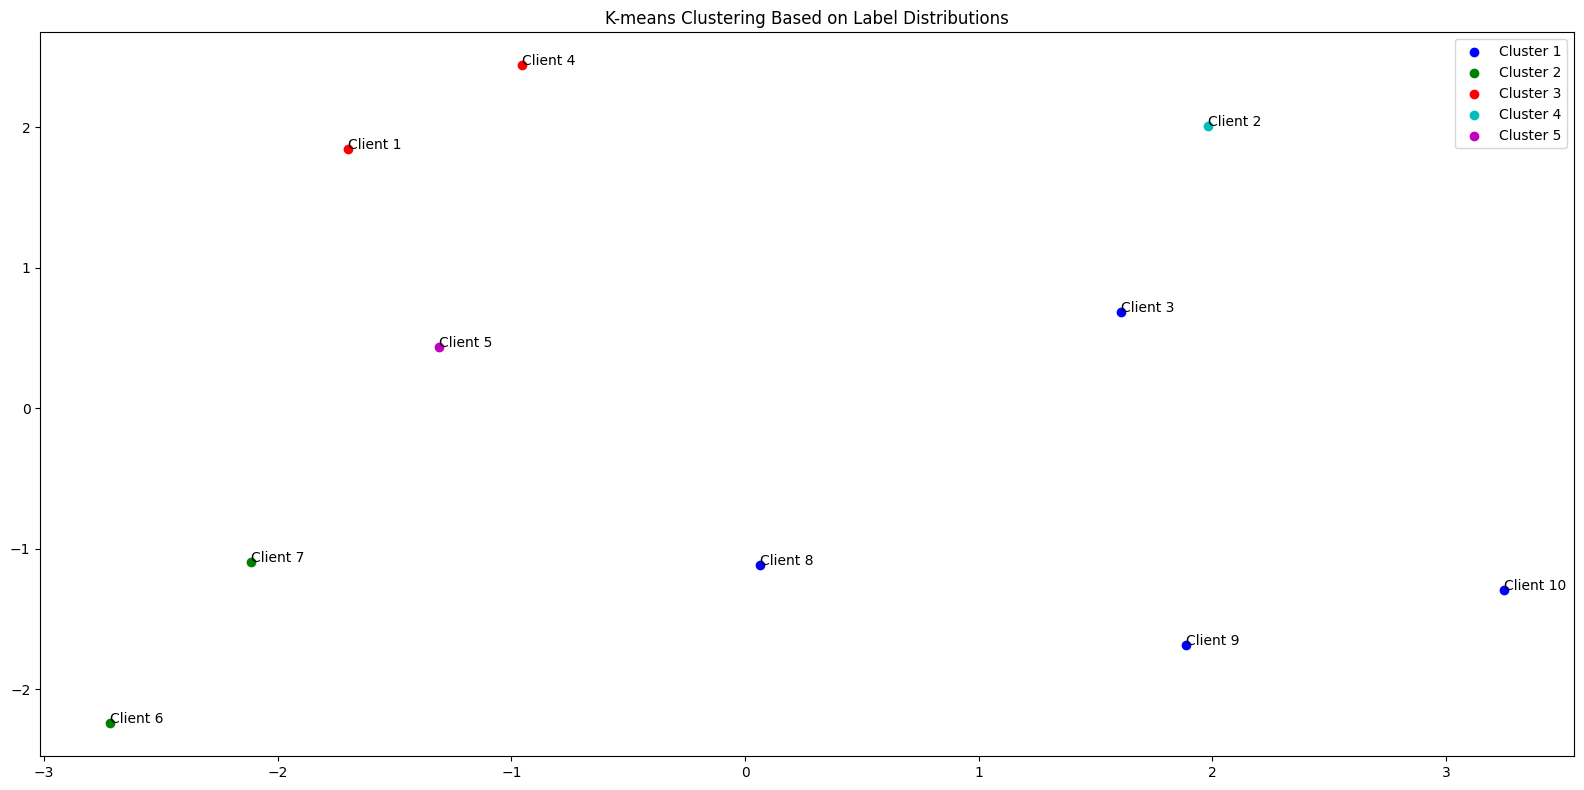

Client client_1 weights: 
Client client_2 weights: 
Client client_3 weights: 
Client client_4 weights: 
Client client_5 weights: 
Client client_6 weights: 
Client client_7 weights: 
Client client_8 weights: 
Client client_9 weights: 
Client client_10 weights: 
Cluster head client_1 weights: 
Cluster head client_2 weights: 
Cluster head client_3 weights: 
Cluster head client_5 weights: 
Cluster head client_6 weights: 


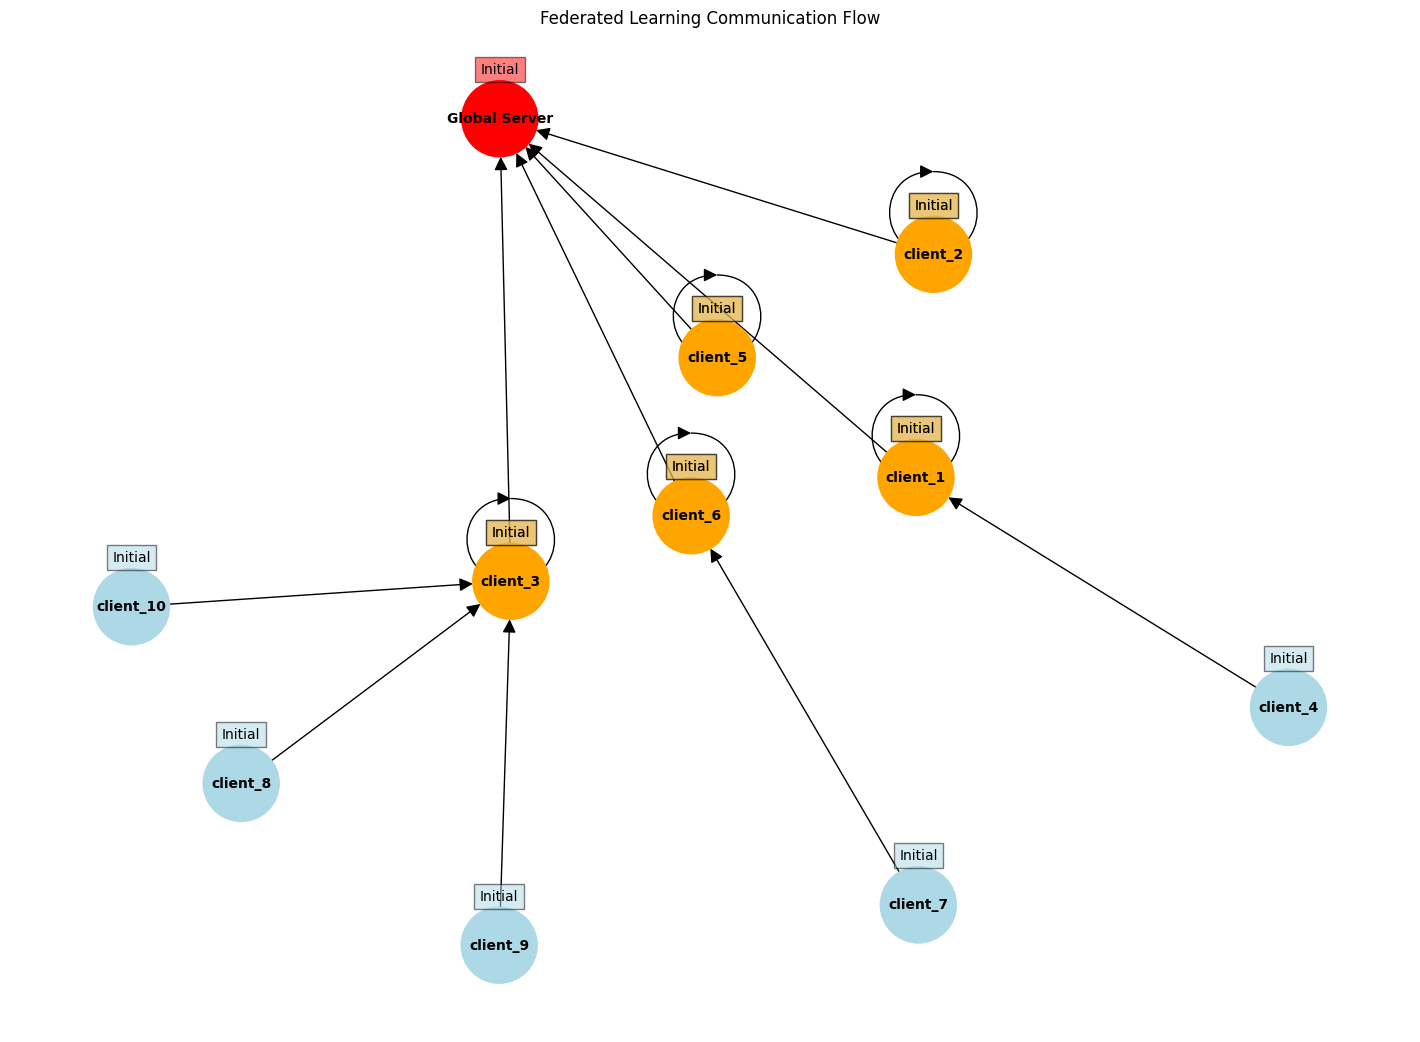

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from collections import defaultdict

import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import defaultdict
import matplotlib.pyplot as plt
def perform_clustering_based_on_labels(client_set, nb_classes):
    label_distributions = calculate_label_distributions(client_set, nb_classes)

    # Standardize the distributions
    scaler = StandardScaler()
    label_distributions = scaler.fit_transform(label_distributions)

    # Perform K-means clustering on client data with a random seed
    random_seed = np.random.randint(0, 10000)
    kmeans = KMeans(n_clusters=5, random_state=random_seed, n_init=10)
    client_clusters = kmeans.fit_predict(label_distributions)

    # Assign cluster heads
    cluster_heads = {}
    clusters = defaultdict(list)

    for client_name, cluster in zip(client_set.keys(), client_clusters):
        clusters[cluster].append(client_name)

    for cluster, members in clusters.items():
        cluster_heads[cluster] = members[0]

    print("Cluster Heads:")
    for cluster, head in cluster_heads.items():
        print(f"Cluster {cluster}: Head {head}")

    # Reduce dimensionality to 2D for visualization using PCA
    pca = PCA(n_components=2)
    label_distributions_2d = pca.fit_transform(label_distributions)

    # Visualization
    plt.figure(figsize=(16, 8))

    # Plot K-means clustering
    plt.title('K-means Clustering Based on Label Distributions')
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for cluster in np.unique(client_clusters):
        cluster_indices = np.where(client_clusters == cluster)
        plt.scatter(label_distributions_2d[cluster_indices, 0], label_distributions_2d[cluster_indices, 1],
                    color=colors[cluster % len(colors)], label=f'Cluster {cluster+1}')
    for i, point in enumerate(label_distributions_2d):
        plt.annotate(f'Client {i+1}', (point[0], point[1]))
    plt.legend()

    plt.tight_layout()
    plt.show()

    return client_clusters, cluster_heads

# Perform initial clustering
client_clusters, cluster_heads = perform_clustering_based_on_labels(clients_batched,nb_classes)

# Visualize initial clustering with initial weights
#visualize_federated_learning_process(clients_batched, cluster_heads, client_clusters, initial=True)

# process and batch the training data for each client
client_set = {k: {} for k in clients_batched.keys()}

for (client_name, data) in clients_batched.items():
    client_set[client_name]["dataset"] = batch_data(data, BATCH_SIZE)
    local_model = get_model(input_shape, nb_classes)
    local_model.compile(loss=loss,
                      optimizer=optimizer,
                      metrics=metrics)
    client_set[client_name]["model"] = local_model






# Call the visualization function after initializing clients, cluster heads, and performing training
visualize_federated_learning_process(clients_batched, cluster_heads, client_clusters, initial=True)

In [50]:
#process and batch the test set

y_test = convert_to_categorical(y_test, nb_classes)

test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

del X_test, y_test

In [51]:
def weight_scalling_factor(clients, client_name):
    client_names = list(clients.keys())
    #get the bs
    bs = list(clients[client_name]["dataset"])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients[client_name]["dataset"]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients[client_name]["dataset"]).numpy()*bs
    return local_count/global_count

In [52]:
def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final

In [53]:
def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)

    return avg_grad

In [54]:
# ##send updates to cluster head
# # Function to send updates to cluster heads
# def send_updates_to_cluster_head(client_set, cluster_heads):
#     cluster_updates = {head: [] for head in cluster_heads.values()}
#     for client_name, client_info in client_set.items():
#         head = cluster_heads[client_clusters[list(client_set.keys()).index(client_name)]]
#         model_weights = client_info["scaled_weights"]  # Use scaled weights
#         # cluster_updates[head].append(model_weights)
#     return cluster_updates

#  # Change in send_updates_to_cluster_head: Used client_set[client]["scaled_weights"] instead of the normal weights.

In [55]:
##send updates to cluster head
# Function to send updates to cluster heads
def send_updates_to_cluster_head(client_set, cluster_heads):
    cluster_updates = {head: [] for head in cluster_heads.values()}
    for client_name, client_info in client_set.items():
        head = cluster_heads[client_clusters[list(client_set.keys()).index(client_name)]]
        model_weights = client_info["model"].get_weights()
        cluster_updates[head].append(model_weights)
    return cluster_updates



In [56]:
##function to aggregate updates at cluster heads

def aggregate_cluster_updates(cluster_updates):
    for head, updates in cluster_updates.items():
        new_weights = [np.mean([client_update[layer] for client_update in updates], axis=0) for layer in range(len(updates[0]))]
        client_set[head]["model"].set_weights(new_weights)
    return {head: client_set[head]["model"].get_weights() for head in cluster_updates.keys()}



In [57]:
##function for global model aggregation

def global_aggregation(cluster_heads_weights):
    return [np.mean([cluster_heads_weights[head][layer] for head in cluster_heads_weights], axis=0) for layer in range(len(list(cluster_heads_weights.values())[0]))]

In [58]:
from sklearn.metrics import accuracy_score

def test_model(X_test, y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    loss = cce(y_test, logits)
    y_hat = np.argmax(logits, axis=1)
    y_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(logits, axis=1))

    r = Recall()
    r.update_state(y_test, logits)
    recall = r.result().numpy()

    p = Precision()
    p.update_state(y_test, logits)
    precision = p.result().numpy()

    f = f1_score(y_test, logits)
    f1 = f.numpy()

    print('comm_round: {} | global_loss: {} | global_accuracy: {:.4} | global_recall: {:.4} | global_precision: {:.4} | global_f1_score: {:.4} \n'.format(comm_round, loss, accuracy, recall, precision, f1))
    return loss, accuracy, precision, recall, f1

In [59]:
# def train_client(client, global_weights, class_weights):
#     client_set[client]["model"] = client_set[client]["model"]

#     #set local model weight to the weight of the global model
#     client_set[client]["model"].set_weights(global_weights)

#     #fit local model with client's data
#     print(f"Round: {comm_round} | Client: {client} training")
#     client_set[client]["model"].fit(client_set[client]["dataset"], epochs=1, verbose=1, class_weight=class_weights)

#     #scale the model weights and add to list
#     scaling_factor = weight_scalling_factor(client_set, client)
#     scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
#     # Added scaling of weights and storing them in client_set.
#     client_set[client]["scaled_weights"] = scaled_weights
#     return scaled_weights

In [60]:
def train_client(client, global_weights, class_weights):
    client_set[client]["model"] = client_set[client]["model"]

    #set local model weight to the weight of the global model
    client_set[client]["model"].set_weights(global_weights)

    #fit local model with client's data
    print(f"Round: {comm_round} | Client: {client} training")
    client_set[client]["model"].fit(client_set[client]["dataset"], epochs=1, verbose=1, class_weight=class_weights)

    #scale the model weights and add to list
    scaling_factor = weight_scalling_factor(client_set, client)
    scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
    return scaled_weights

In [61]:
def verify_weight_shapes(global_weights, local_weights):
    for gw, lw in zip(global_weights, local_weights):
        if gw.shape != lw.shape:
            raise ValueError(f"Global weight shape {gw.shape} does not match local weight shape {lw.shape}")

In [ ]:
import random

def compare_weights(weights1, weights2):
    return [np.allclose(w1, w2) for w1, w2 in zip(weights1, weights2)]

# Initial global weights
initial_global_weights = global_model.get_weights()

#commence global training loop
global_loss=[]
global_accuracy=[]
global_precision=[]
global_recall=[]
global_f1=[]
best_global_accuracy = 0

for comm_round in range(comms_round):
    print(f"Comm Round {comm_round}")

    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()

    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(client_set.keys())
    random.shuffle(client_names)

    #loop through each client and create new local model
    for client in client_names:
        scaled_weights = train_client(client, global_weights, class_weights)

        scaled_local_weight_list.append(scaled_weights)


    # Compare weights after client training
    client_weights_comparison = [compare_weights(global_weights, w) for w in scaled_local_weight_list]
    #print(f"Client weights comparison after training: {client_weights_comparison}")


    ##global level update
     # Send updates to cluster heads
    cluster_updates = send_updates_to_cluster_head(client_set, cluster_heads)

    # Cluster heads aggregate updates
    cluster_heads_weights = aggregate_cluster_updates(cluster_updates)

    # Compare weights after cluster aggregation
    cluster_weights_comparison = compare_weights(global_weights, cluster_heads_weights[list(cluster_heads_weights.keys())[0]])
    #print(f"Cluster weights comparison after aggregation: {cluster_weights_comparison}")

    # Global model aggregates from cluster heads
    global_weights = global_aggregation(cluster_heads_weights)
    global_model.set_weights(global_weights)

    #print(f"Global weights updated in comm round {comm_round} - {global_weights}")
    global_weights_comparison = compare_weights(initial_global_weights, global_weights)
    #print(f"Global weights comparison after aggregation: {global_weights_comparison}")



    g_accuracy = 0
    for(x_batch, y_batch) in test_batched:
        g_loss, g_accuracy, g_precision, g_recall, g_f1 = test_model(x_batch, y_batch, global_model, comm_round)
        global_loss.append(g_loss)
        global_accuracy.append(g_accuracy)
        global_precision.append(g_precision)
        global_recall.append(g_recall)
        global_f1.append(g_f1)

    if g_accuracy > best_global_accuracy:
        best_global_accuracy = g_accuracy
        global_model.save_weights('global_model_best_weights.h5')
        print("New Weights Saved")



     # Re-cluster clients based on updated weights
    #client_clusters, cluster_heads = perform_clustering_based_on_labels(clients_batched,nb_classes)

    # Visualize the process after each communication round
    #visualize_federated_learning_process(client_set, cluster_heads, client_clusters, global_model=global_model)





Comm Round 0
Round: 0 | Client: client_8 training
5781/5781 [==============================] - 180s 30ms/step - loss: 0.2372 - accuracy: 0.8643 - recall: 0.8606 - precision: 0.8672 - f1_score: 0.8634
Round: 0 | Client: client_6 training
12482/12482 [==============================] - 383s 30ms/step - loss: 0.2015 - accuracy: 0.9074 - recall: 0.8921 - precision: 0.8953 - f1_score: 0.9073
Round: 0 | Client: client_2 training
6542/6542 [==============================] - 202s 30ms/step - loss: 0.2402 - accuracy: 0.8786 - recall: 0.8870 - precision: 0.8923 - f1_score: 0.8770
Round: 0 | Client: client_4 training
8523/8523 [==============================] - 262s 30ms/step - loss: 0.2871 - accuracy: 0.8932 - recall: 0.8881 - precision: 0.8929 - f1_score: 0.8926
Round: 0 | Client: client_5 training
8507/8507 [==============================] - 262s 30ms/step - loss: 0.1486 - accuracy: 0.9144 - recall: 0.8930 - precision: 0.8976 - f1_score: 0.9140
Round: 0 | Client: client_1 training
10108/10108 [

In [ ]:
# import random

# #commence global training loop
# global_loss=[]
# global_accuracy=[]
# global_precision=[]
# global_recall=[]
# global_f1=[]
# best_global_accuracy = 0

# for comm_round in range(comms_round):
#     # get the global model's weights - will serve as the initial weights for all local models
#     global_weights = global_model.get_weights()

#     #initial list to collect local model weights after scalling
#     scaled_local_weight_list = list()

#     #randomize client data - using keys
#     client_names= list(client_set.keys())
#     random.shuffle(client_names)

#     #loop through each client and create new local model
#     for client in client_names:
#         scaled_weights = train_client(client, global_weights, class_weights)

#         scaled_local_weight_list.append(scaled_weights)

#     #to get the average over all the local model, we simply take the sum of the scaled weights
#     average_weights = sum_scaled_weights(scaled_local_weight_list)

#     #update global model
#     global_model.set_weights(average_weights)

#     #test global model and print out metrics after each communications round
#     g_accuracy = 0
#     for(x_batch, y_batch) in test_batched:
#         g_loss, g_accuracy, g_precision, g_recall, g_f1 = test_model(x_batch, y_batch, global_model, comm_round)
#         global_loss.append(g_loss)
#         global_accuracy.append(g_accuracy)
#         global_precision.append(g_precision)
#         global_recall.append(g_recall)
#         global_f1.append(g_f1)

#     if g_accuracy > best_global_accuracy:
#         best_global_accuracy = g_accuracy
#         global_model.save_weights('global_model_best_weights.h5')
#         print("New Weights Saved")

In [ ]:
global_model.load_weights("global_model_best_weights.h5")


In [ ]:
loss, accuracy, precision, recall, f1_score = test_model(x_batch, y_batch, global_model, comm_round)
print("loss : ", loss.numpy())
print("accuracy : ", accuracy)
print("precision : ", precision)
print("recall : ", recall)
print("f1_score : ", f1_score)

37275/37275 [==============================] - 233s 6ms/step
comm_round: 9 | global_loss: 1.8139653205871582 | global_accuracy: 0.7164 | global_recall: 0.7161 | global_precision: 0.7167 | global_f1_score: 0.7164 

loss :  1.8139653
accuracy :  0.7164369803133169
precision :  0.7166953
recall :  0.7161335
f1_score :  0.7164142


In [ ]:
for(x_batch, y_batch) in test_batched:
    logits = global_model.predict(x_batch)
    y_hat = np.argmax(logits, axis=1)
    y_true = np.argmax(y_batch, axis=1)

37275/37275 [==============================] - 232s 6ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn


def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))

    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))

In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

def ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, n_classes):
    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(20,20))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(label_encoder.classes_[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("multiclass characteristic")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
y_true_ohe = to_categorical(y_true, num_classes=len(label_encoder.classes_))
y_hat_ohe =  to_categorical(y_hat, num_classes=len(label_encoder.classes_))

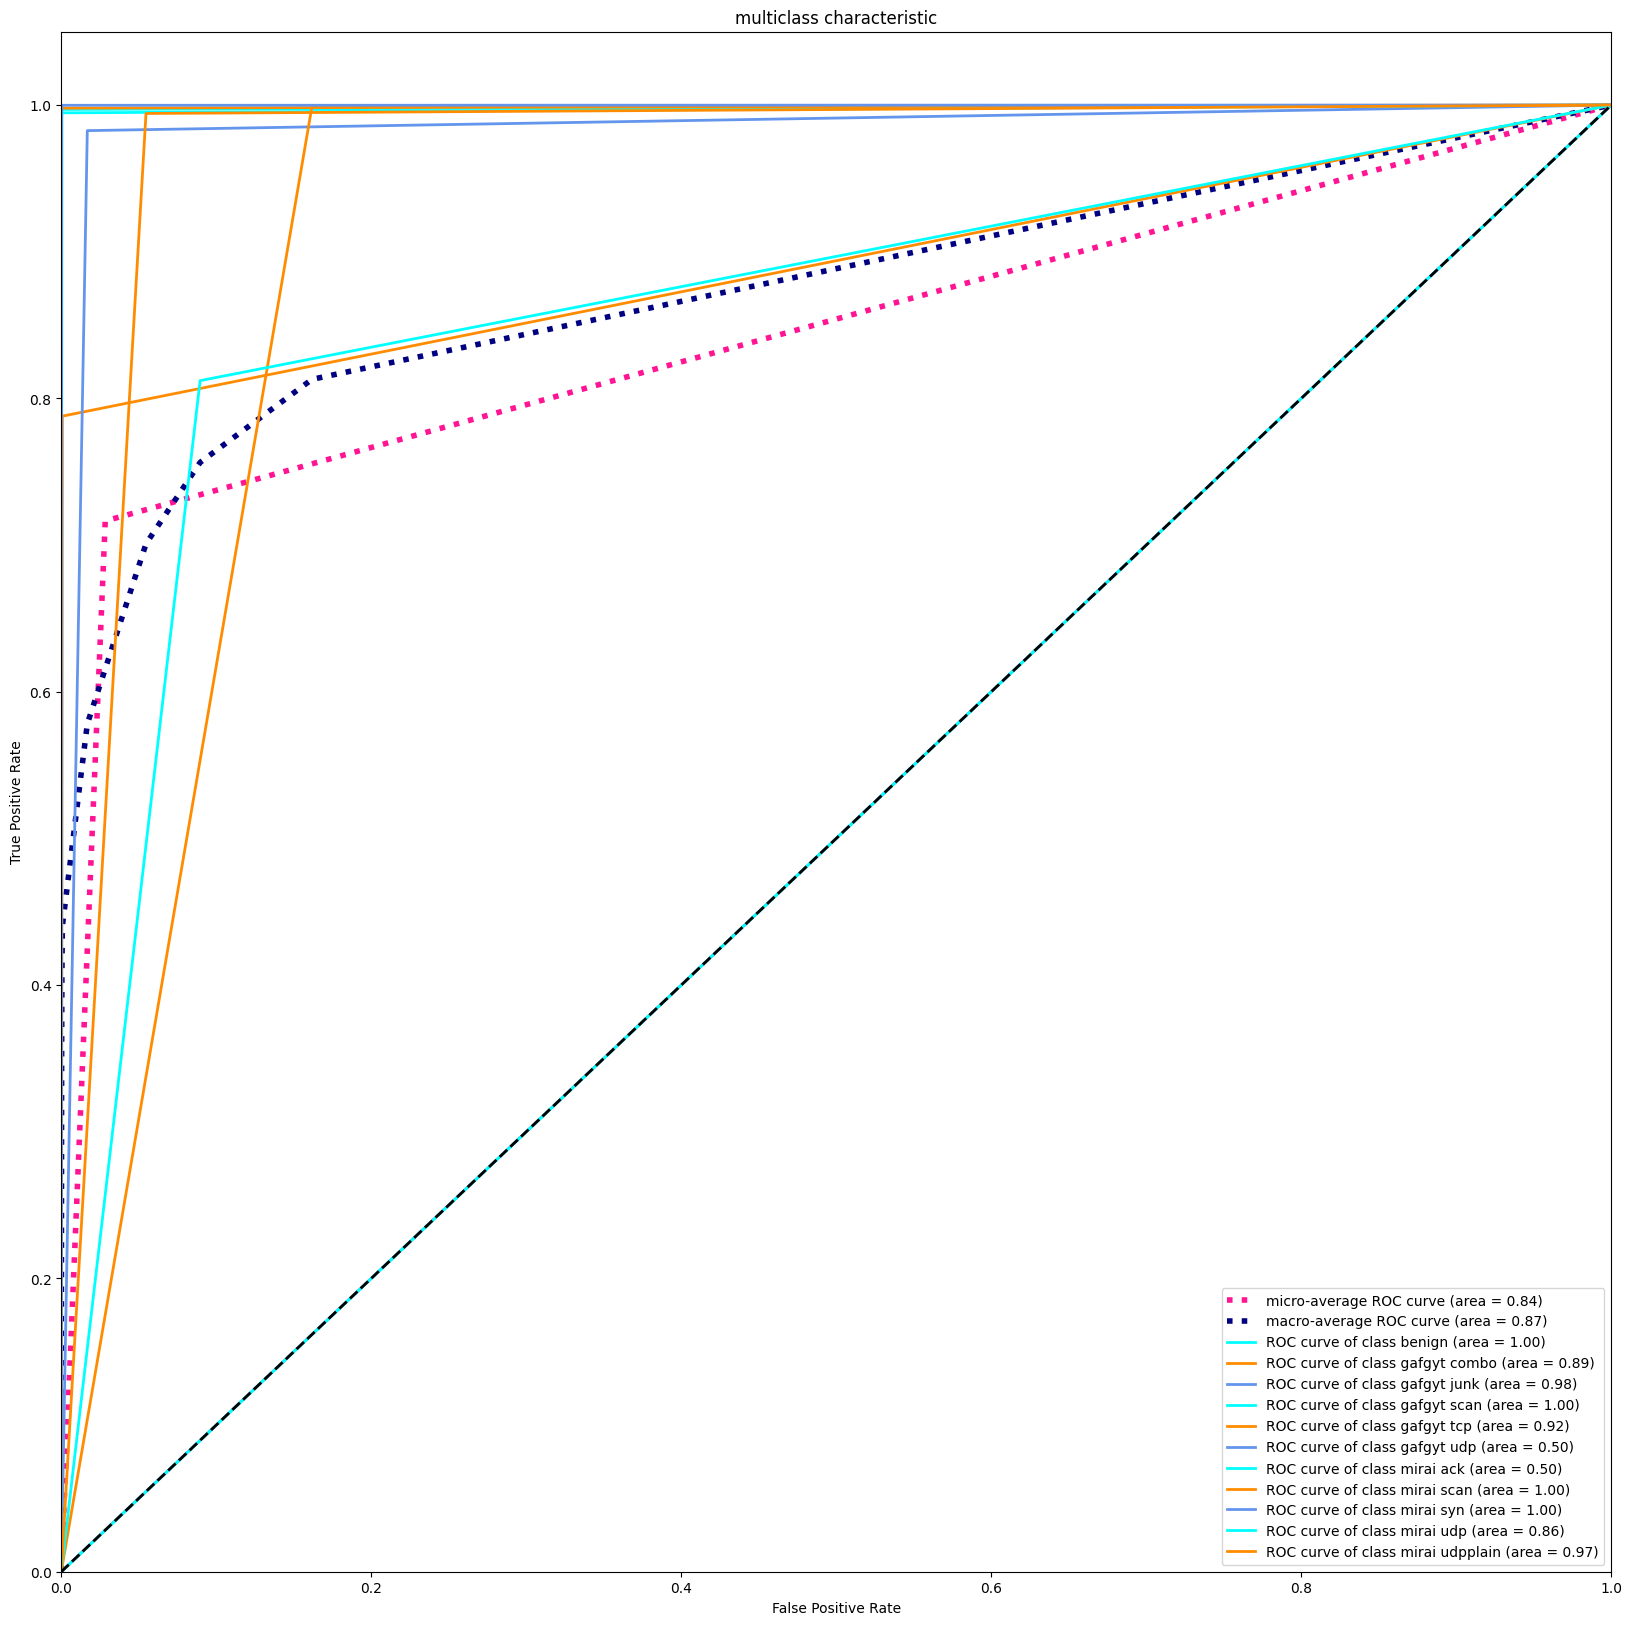

In [ ]:
ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, len(label_encoder.classes_))


Accuracy:  0.7164369803133169
Precision::  0.7164369803133169
Recall::  0.7164369803133169
F1_Score::  0.7164369803133169

Macro precision_recall_fscore_support (macro) average
(0.7409950596136745, 0.7786764346338974, 0.7088064693524528, None)

Macro precision_recall_fscore_support (micro) average
(0.7164369803133169, 0.7164369803133169, 0.7164369803133169, None)

Macro precision_recall_fscore_support (weighted) average
(0.701961703676714, 0.7164369803133169, 0.6374081907944199, None)

Confusion Matrix

Classification Report
                precision    recall  f1-score   support

        benign       0.99      1.00      1.00     76138
  gafgyt combo       0.99      0.79      0.88     91401
   gafgyt junk       0.70      0.98      0.82     46688
   gafgyt scan       1.00      0.99      0.99     45450
    gafgyt tcp       0.48      1.00      0.65    153454
    gafgyt udp       0.75      0.00      0.00    168117
     mirai ack       0.00      0.00      0.00    110540
    mirai scan      

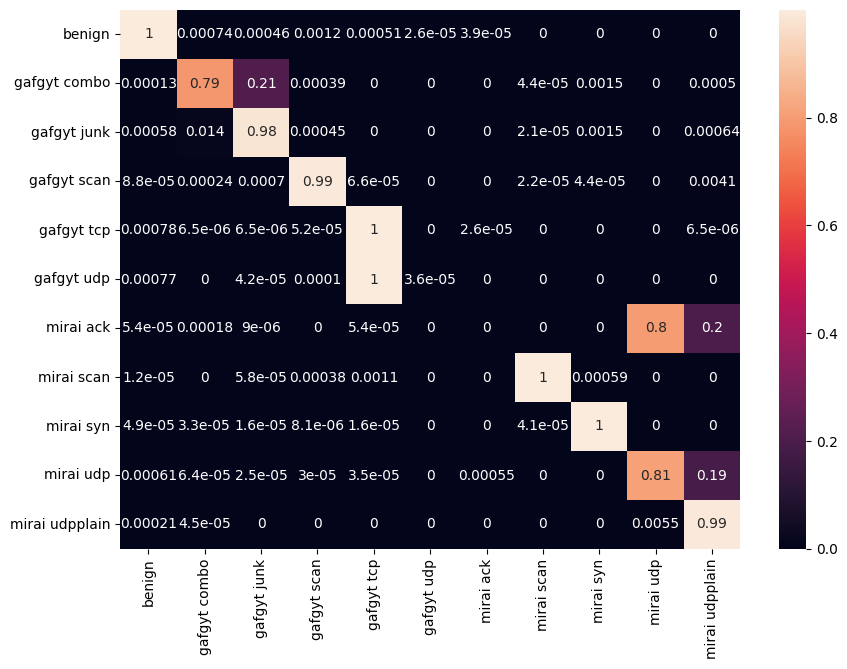

In [ ]:
print_score(y_hat, y_true, label_encoder)

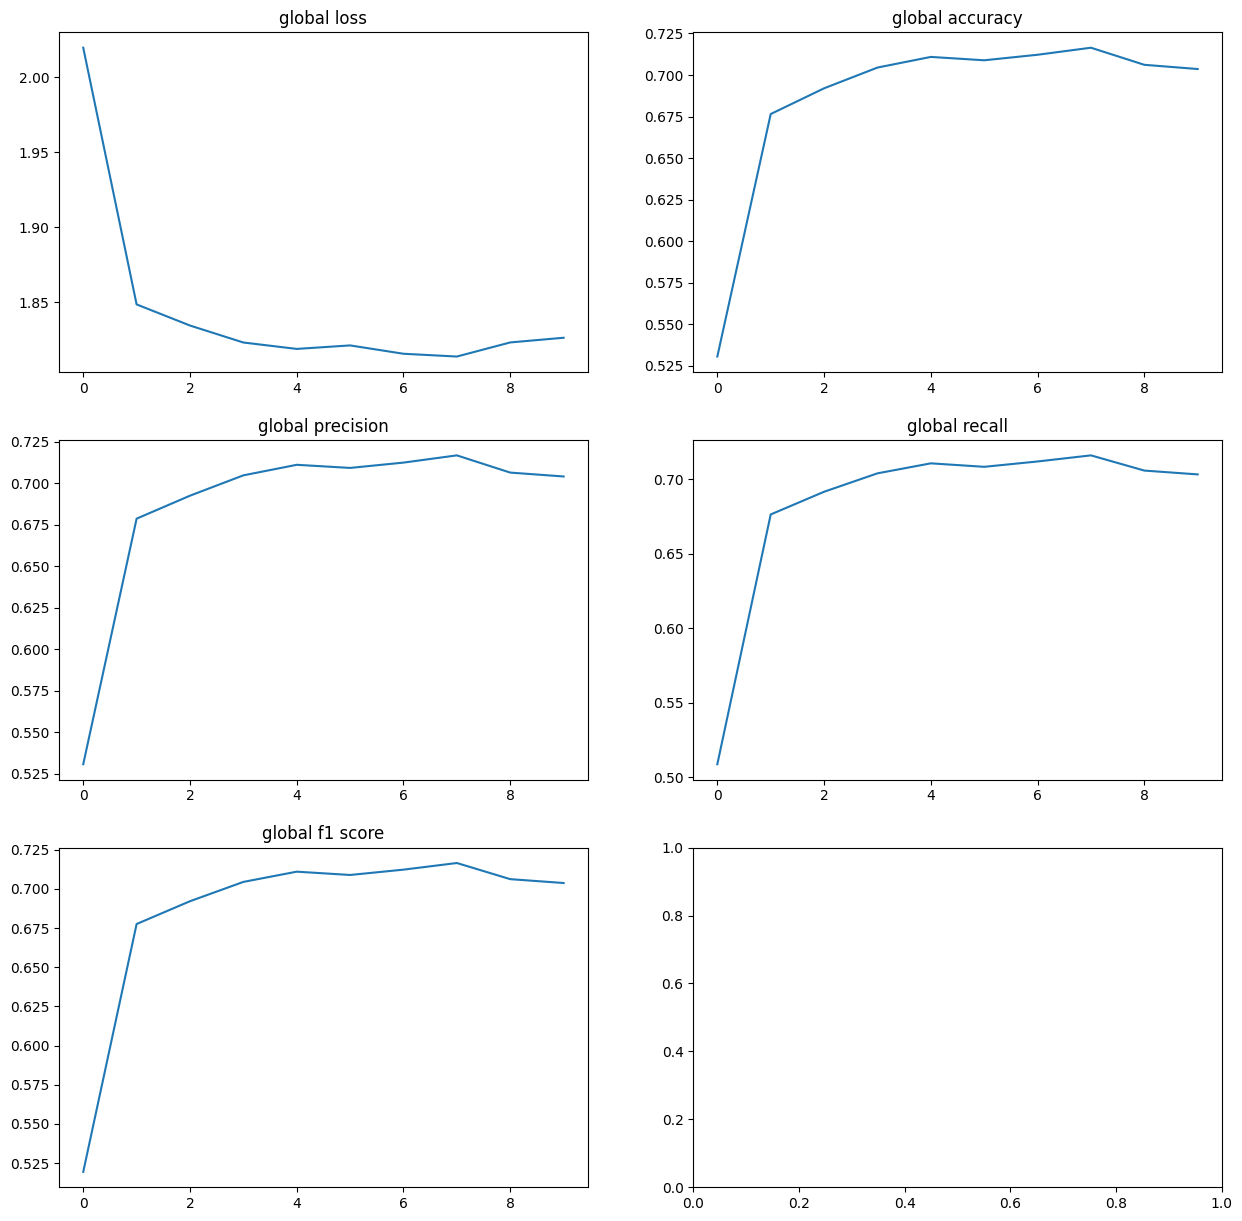

In [ ]:
figure, axis = plt.subplots(3, 2, figsize=(15, 15))

axis[0, 0].plot(global_loss)
axis[0, 0].set_title("global loss")

axis[0, 1].plot(global_accuracy)
axis[0, 1].set_title("global accuracy")

axis[1, 0].plot(global_precision)
axis[1, 0].set_title("global precision")

axis[1, 1].plot(global_recall)
axis[1, 1].set_title("global recall")

axis[2, 0].plot(global_f1)
axis[2, 0].set_title("global f1 score")

plt.show()